# The Peaking Power-Plants

## Motivation

You are the boss of an electricity distribution company. Based on the contracts with the end-users, you know the demand on the amount of the electrical energy between hour $t$ and $(t+1)$ next day; i.e., you have vector $\bar{d} = (d_0, d_1, \dots, d_{23})$ of demands.

Your company owns several power-plants and wants to cover the demands by switching these plants on and off. There are two types of power-plants: `base` and `peak` plants (there are $n_{base}$ and $n_{peak}$ of these plants).

* **Base power-plants** (zdroje základního zatížení) are cheap, but it takes a long time to start them and turn them off; therefore, they need to be either turned on or turned off the whole day. These plants produce $e_{base}$ energy every hour and their running cost is $c_{base}$ every hour.
    
* **Peak power-plants** (špičkové zdroje) are fast, and can be turned on/off every hour, but typically the price is high. These plants produce $e_{peak}$ energy every hour and their running cost $c_{peak}$ (every hour).


The surplus energy is being stored in the batteries (storage) and can be used later. However, there is a loss modeled by parameter $\gamma \in [0,1]$. If $k$ units of energy leave the storage, only $\gamma \cdot k$ units can be used to cover demands (the rest, i.e., $(1-\gamma)\cdot k$, is lost).

The capacity of the storage is limited to $s_{max}$ units, and due to technological restrictions, it is impossible to take the energy from the storage and store it inside simultaneously. The produced energy needs to cover the demands or be stored in the batteries (energy cannot just vanish). The storage is empty at the beginning.

You want to minimize to total cost (turning the power-plants on/off) while covering all the demands.

## Input

You are given the following:

* $\mathbf{d} = (d_0,d_1,\dots,d_{23})$ – vector of demands
* $n_{base},n_{peak}$ – number of the respective power-plants
* $c_{base}, c_{peak}$ – cost needed for the running of the respective type of the plant (per hour)
* $e_{base}, e_{peak}$ – amount of energy generated by the respective type (per hour)
* $s_{max}$ – storage capacity
* $(1−\gamma)$ – energy loss of the storage (only $\gamma \cdot k$ energy units can be used out of $k$ units)

For the testing purposes, you can experiment with the following instance:

In [20]:
d = [5, 5, 5, 5, 5, 10, 10, 15, 20, 20, 30, 30, 40, 50, 60, 60, 60, 50, 40, 30, 30, 20, 10, 5]

n_base = 3
e_base = 7
c_base = 2.0 / 24.0

n_peak = 40
e_peak = 2
c_peak = 12

s_max = 100

gamma = 0.75

## Output

Your goal is to find the number of `base` power-plants that should be active throughout the whole day, as well as the number of `peak` power-plants that should be active every hour such that the cost is minimized.

The **optimal solution** for the given instance is:

* $2$ active base power-plants
* $(0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 5, 8, 13, 7, 23, 23, 23, 18, 13, 8, 8, 3, 0, 0)$ active peak power-plants (every hour)

The corresponding cost is $1840$.

## Exercise

Implement the ILP modelfor the peaking power-plants problem, solve it and examine the solution.

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (linux64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 24 rows, 25 columns and 48 nonzeros
Model fingerprint: 0x12509ab6
Variable types: 0 continuous, 25 integer (0 binary)
Coefficient statistics:
  Matrix range     [2e+00, 7e+00]
  Objective range  [2e+00, 1e+01]
  Bounds range     [3e+00, 4e+01]
  RHS range        [5e+00, 6e+01]
Found heuristic solution: objective 3732.0000000
Presolve removed 24 rows and 25 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 2: 1566 3732 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.566000000000e+03, best bound 1.566000000000e+03, gap 0.0000%


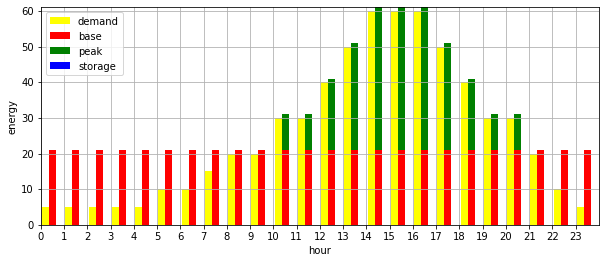

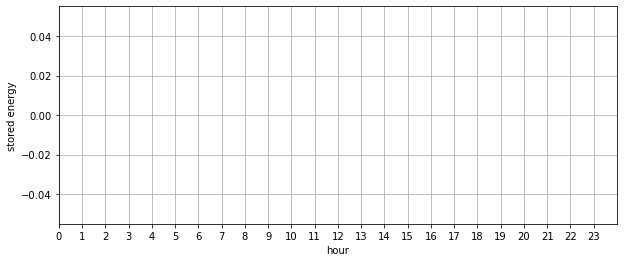

In [21]:
import gurobipy as gb
T = len(d)
# MODEL
m = gb.Model()

# - ADD VARIABLES
b = m.addVar(vtype=gb.GRB.INTEGER, lb=0, ub=n_base, name="b")
p = m.addVars(T, vtype=gb.GRB.INTEGER, lb=0, ub=n_peak, name="p")
# - ADD CONSTRAINTS
m.addConstrs(b*e_base + p[i]*e_peak >= d[i]
             for i in range(T))

# - SET OBJECTIVE
m.setObjective(24*b*c_base + c_peak*p.sum("*"))

m.optimize()

plot_demands(b.X, [p[i].X for i in range(T)], [0 for i in range(T)], [0 for i in range(T)])

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (linux64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 97 rows, 122 columns and 289 nonzeros
Model fingerprint: 0x8847c9c4
Variable types: 48 continuous, 74 integer (24 binary)
Coefficient statistics:
  Matrix range     [8e-01, 1e+02]
  Objective range  [2e+00, 1e+01]
  Bounds range     [1e+00, 1e+02]
  RHS range        [5e+00, 1e+02]
Presolve removed 4 rows and 4 columns
Presolve time: 0.00s
Presolved: 93 rows, 118 columns, 279 nonzeros
Variable types: 46 continuous, 72 integer (23 binary)
Found heuristic solution: objective 3732.0000000

Root relaxation: objective 1.050000e+03, 68 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 1050.00000    0   16 3732.00000 1050.00000  71.9%     -    0s
H    0     0                    2762.000

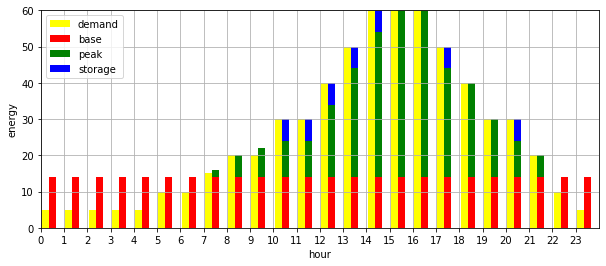

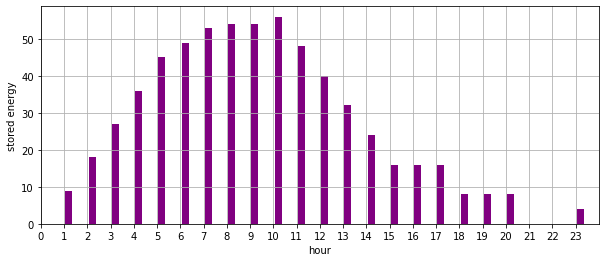

In [22]:
import gurobipy as gb
T = len(d)
# MODEL
m = gb.Model()

# - ADD VARIABLES
b = m.addVar(vtype=gb.GRB.INTEGER, lb=0, ub=n_base, name="b")
p = m.addVars(T, vtype=gb.GRB.INTEGER, lb=0, ub=n_peak, name="p")
s = m.addVars(T+1, vtype=gb.GRB.INTEGER, lb=0, ub=s_max, name="s")
a_put = m.addVars(T, vtype=gb.GRB.CONTINUOUS, lb=0, name="a_put")
a_take = m.addVars(T, vtype=gb.GRB.CONTINUOUS, lb=0, name="a_take")
x = m.addVars(T, vtype=gb.GRB.BINARY, name="x")
# - ADD CONSTRAINTS
m.addConstrs(b*e_base + p[i]*e_peak - a_put[i] + gamma*a_take[i] == d[i]
             for i in range(T))
#storage
m.addConstr(s[0] == 0)
m.addConstrs(s[i+1] == s[i] + a_put[i] - a_take[i] for i in range(T))

#put or take
M = s_max
m.addConstrs(a_put[i] <= (1-x[i])*M for i in range(T))
m.addConstrs(a_take[i] <= x[i]*M for i in range(T))
# - SET OBJECTIVE
m.setObjective(24*b*c_base + c_peak*p.sum("*"))

m.optimize()

plot_demands(b.X,
             [p[i].X for i in range(T)],
             [a_take[i].X for i in range(T)],
             [s[i].X for i in range(T)])

## Solution visualization

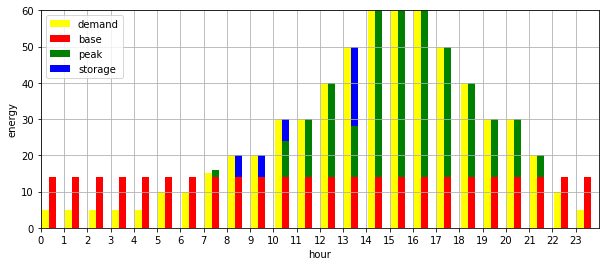

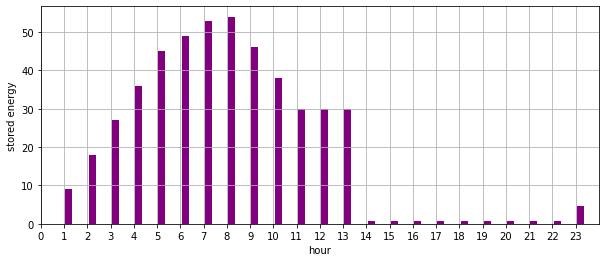

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def plot_demands(n_base, n_peak_every_hour, storage_take_every_hour, storage_state_every_hour):
    """
    n_base: number of active base power-plants
    n_peak_every_hour: a list containing the number of active peak power-plants (every hour)
    storage_take_every_hour: a list containing the amount of energy, which is taken from the storage (every hour)
    storage_state_every_hour: a list containing the amount of energy, which is stored in the storage (every hour)
    """
    # Demand plot
    T = 24
    margin = 0.2
    width = 0.3
    plt.figure(figsize=(10, 4))
    plt.bar([t + margin for t in range(T)], d, width=width, color='yellow')
    
    # - base power-plants
    bottom = np.zeros(T)
    g_base = np.array([e_base * n_base for t in range(T)])
    plt.bar([t + margin + width for t in range(T)],
            g_base,
            width=width,
            bottom=bottom,
            color='red')
    bottom += g_base
    
    # - peak power-plants
    g_peak = np.array([e_peak * n_peak_every_hour[t] for t in range(T)])
    plt.bar([t + margin + width for t in range(T)],
            g_peak,
            width=width,
            bottom=bottom,
            color='green')
    bottom += g_peak
    
    # - storage
    g_a_take = np.array([gamma * storage_take_every_hour[t] for t in range(T)])
    plt.bar([t + margin + width for t in range(T)],
            g_a_take,
            width=width,
            bottom=bottom,
            color='blue')
    bottom += g_a_take

    plt.xlabel("hour")
    plt.ylabel("energy")
    plt.legend(['demand', 'base', 'peak', 'storage'], ncol=1, loc=2)
    plt.xlim(0, 24)    
    plt.xticks(range(24), [i % 24 for i in range(24)])
    plt.grid()    

    # Storage plot.
    plt.figure(figsize=(10, 4))
    plt.xlim(0, 24)
    plt.xticks(range(24), [i % 24 for i in range(24)])
    plt.xlabel("hour")
    plt.ylabel("stored energy")    
    plt.bar([t + margin for t in range(T)], [storage_state_every_hour[t] for t in range(T)], width=width, color='purple')
    plt.grid()    

    plt.show()
    
# The optimal solution
n_base_opt = 2
n_peak_opt = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 5, 8, 13, 7, 23, 23, 23, 18, 13, 8, 8, 3, 0, 0]
storage_take_opt = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 8.0, 7.999999999999973, 0.0, 0.0, 29.333333333333275, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
storage_state_opt = [0.0, 9.0, 17.999999999999773, 26.99999999999942, 35.999999999999, 44.99999999999851, 48.999999999997975, 52.99999999999757, 53.999999999997, 45.999999999997, 37.999999999997, 29.99999999999703, 29.999999999997026, 29.999999999997026, 0.6666666666637511, 0.6666666666637511, 0.6666666666637511, 0.6666666666637511, 0.6666666666637511, 0.6666666666637511, 0.6666666666637511, 0.6666666666637511, 0.6666666666637511, 4.666666666663695]

# TODO: visualize your solution
# Call this function with 
# - the number of base power-plants to be activated,
# - list of the numbers of the peak power-plants to be activated (every hour),
# - list containing the amount of power taken from the storage (every hour),
# - list containing the amount of energy in the storage (every hour)
plot_demands(n_base_opt, n_peak_opt, storage_take_opt, storage_state_opt)